Лабораторная работа № 1

Предобработка данных

Выполнил: Королёв Фёдор Олегович, ПИ15

**Загрузка данных**

1. Загрузить датасет по ссылке: https://www.kaggle.com/uciml/glass . Данные представлены в
виде csv таблицы.
2. Создать Python скрипт. Загрузить датасет в датафрейм, и разделить данные на
описательные признаки и признак отображающий класс.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

3. Провести нормировку данных к интервалу [0 1]

In [ ]:
from sklearn import preprocessing
data = preprocessing.minmax_scale(data)

4. Построить диаграммы рассеяния для пар признаков. Самостоятельно определите
соответствие цвета на диаграмме и класса в датасете

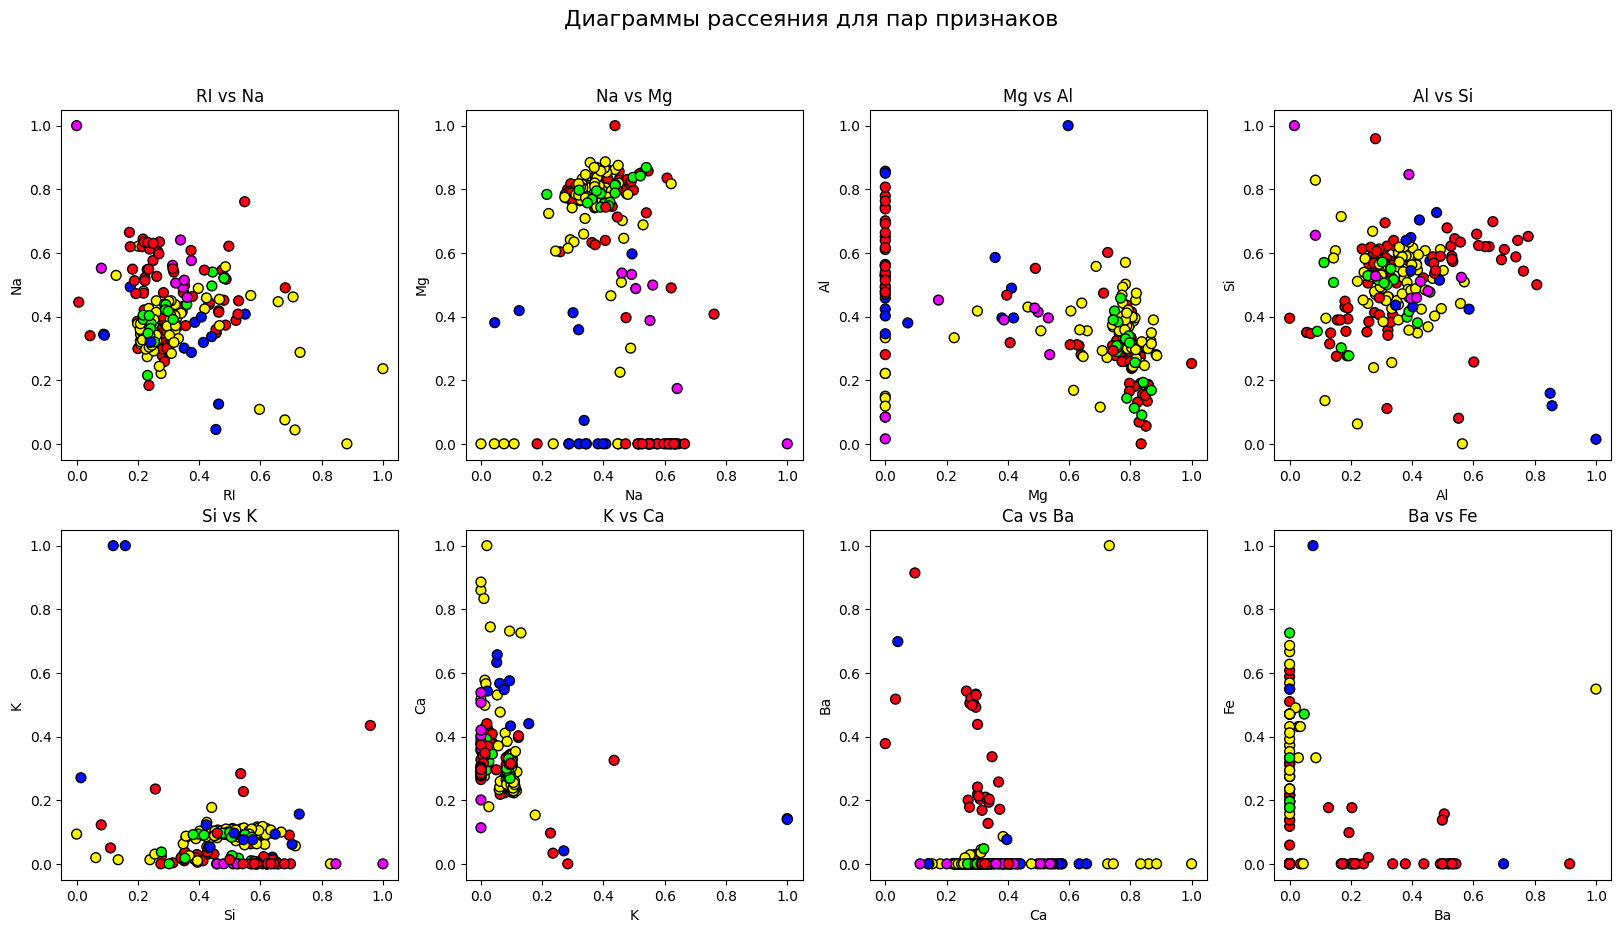

In [12]:
import matplotlib.pyplot as plt

# Я так понял, что а 'labels' - массив классов (меток) для каждой точки
# 'var_names' - список названий переменных.


fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Увеличиваем размер фигуры для лучшей видимости
fig.suptitle('Диаграммы рассеяния для пар признаков', fontsize=16)

# Перебираем все пары признаков
for i in range(data.shape[1] - 1):
    axs[i // 4, i % 4].scatter(data[:, i], data[:, i + 1], c=labels, cmap='hsv', edgecolor='k', s=50)
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i + 1])
    axs[i // 4, i % 4].set_title(f'{var_names[i]} vs {var_names[i + 1]}')

plt.show()


Для определения цвета на диаграмме и класса в датасете, используем функцию scatter, построим scatter-plot с использованием метки классов по label

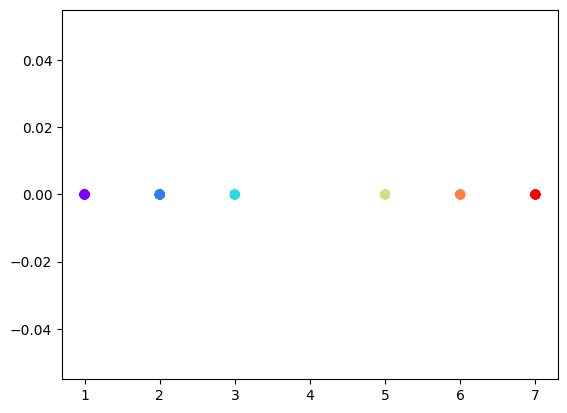

In [41]:
# Строим диаграмму рассеяния, где по оси X отображаются метки классов (labels)
# По оси Y устанавливаем нулевое значение для всех точек, чтобы разместить их на одной горизонтальной линии
plt.scatter(labels, [0] * len(labels), c=labels, cmap='rainbow')

plt.show()

**Метод главных компонент**

1. Используя метод главных компонент (PCA). Проведите понижение размерности
пространства до размерности 2

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

2. Выведите значение объясненной дисперсии в процентах и собственные числа
соответствующие компонентам

In [15]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.45429569 0.17990097]
[5.1049308  3.21245688]


3. Постройте диаграмму рассеяния после метода главных компонент

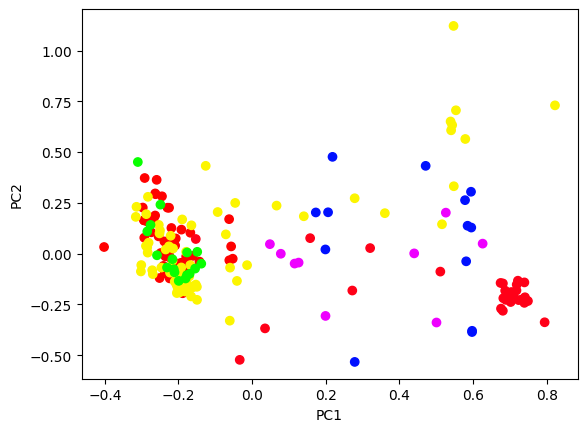

In [24]:
fig, axs = plt.subplots(1,1)

axs.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')

plt.show()

4. Проанализируйте и обоснуйте полученные результаты

На графике можно увидеть заметные кластеры для некоторых типов стекла, хотя есть и пересечения, что указывает на то, что PCA достаточно хорошо разделяет классы, но есть некоторые ограничения в чёткости разделения. В правой части графика данные красного класса скучковались. Так как пространство было понижено до PC1 и PC2, то можно сказать, что для красных точек более важной составляющей является PC1, чем PC2. Для типов же 1, 2, 3 PC1 не является важным компонентом

5. Изменяя количество компонент, определите количество при котором компоненты
объясняют не менее 85% дисперсии данных

In [40]:
pca = PCA(n_components=4)  # Устанавливаем количество компонент на 4

# Применяем метод fit и transform к данным, чтобы получить преобразованные данные в пространстве главных компонент
pca_data = pca.fit(data).transform(data)  # fit обучает модель на данных и transform применяет преобразование

# Получаем доли объясненной дисперсии для каждой главной компоненты
expl_var_ratio = pca.explained_variance_ratio_  # Сохраняем доли объясненной дисперсии в переменной

# Вычисляем сумму всех долей объясненной дисперсии
expl_var_sum = np.sum(expl_var_ratio)  # Суммируем все значения из expl_var_ratio

print(expl_var_sum)  # Печатаем общую долю объясненной дисперсии для всех выбранных компонент

0.8586697305102716


Перебирая количество компонент методом математического тыка, было установлено, что необходимое значение для 85% дисперсии данных - 4

6. Используя метод inverse_transform восстановите данные, сравните с исходными

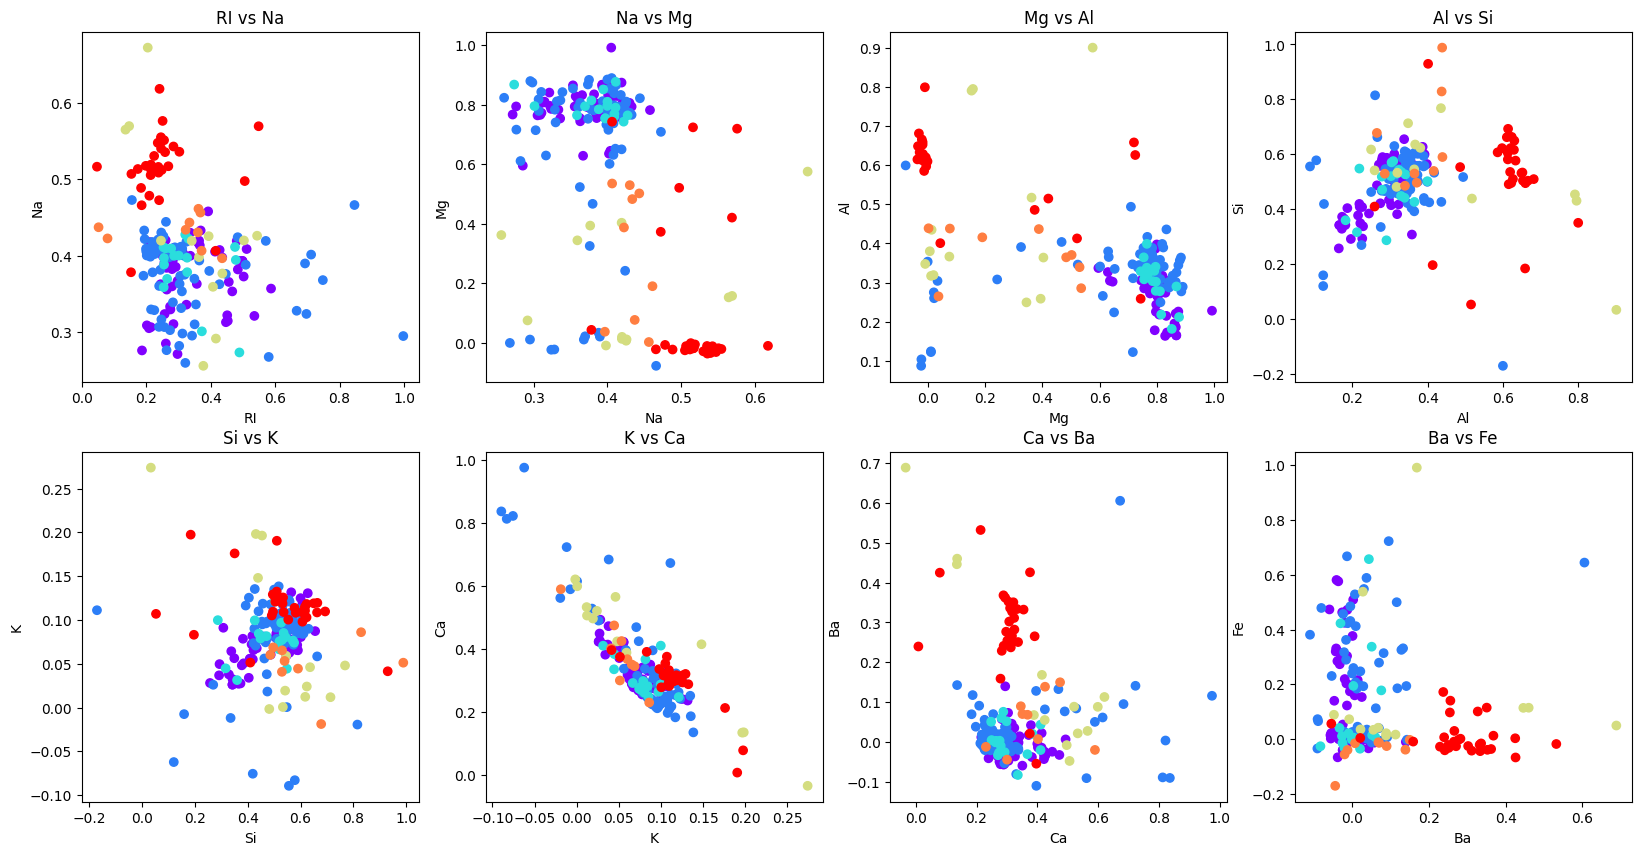

In [39]:
pca_data_inv = pca.inverse_transform(pca_data)  # Метод inverse_transform восстанавливает оригинальные данные

fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Увеличиваем размер фигуры для лучшей видимости

# Перебираем все пары признаков в восстановленных данных
for i in range(data.shape[1] - 1):  # data.shape[1] - 1 позволяет избежать выхода за границы массива

    # Строим диаграмму рассеяния для каждой пары признаков
    axs[i // 4, i % 4].scatter(pca_data_inv[:, i], pca_data_inv[:, i + 1], c=labels, cmap='rainbow')
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i + 1])

    # Устанавливаем заголовок для текущего подграфика с указанием сравниваемых признаков
    axs[i // 4, i % 4].set_title(f'{var_names[i]} vs {var_names[i + 1]}')

plt.show()

Применяем обратное преобразование PCA к данным, чтобы восстановить их из пространства главных компонент. Данные похожи на изначальные, но есть разница из-за того, что при инверсии не учитывались компоненты, которые ответственны за 15% процентов дисперсии

7. Исследуйте метод главных компонент при различных параметрах svd_solver

[0.45429569 0.17990097]
[5.1049308  3.21245688]


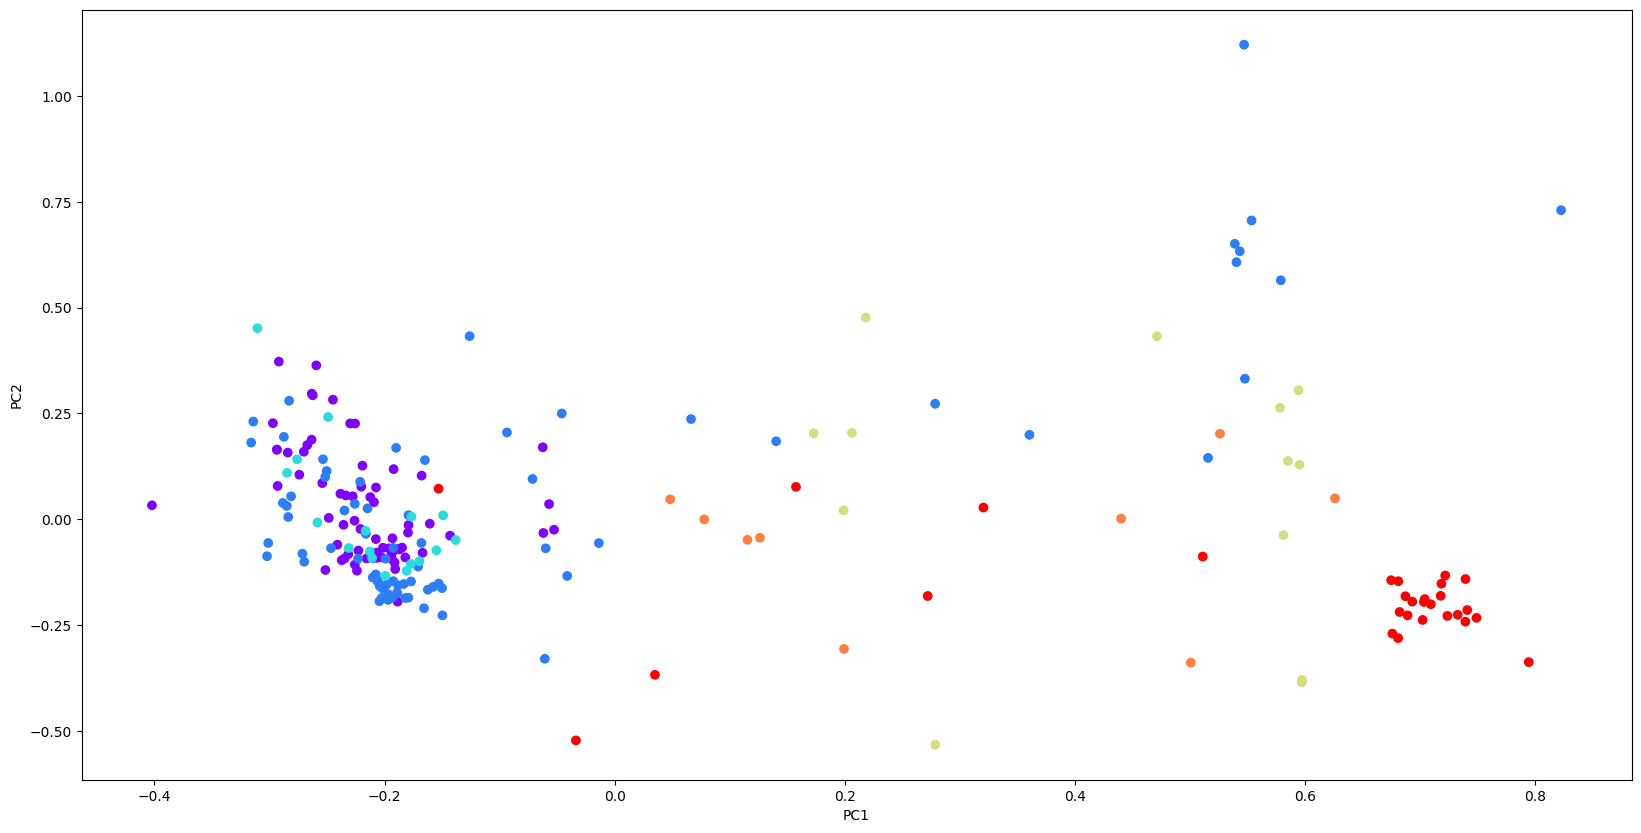

[0.45429569 0.17990097]
[5.1049308  3.21245688]


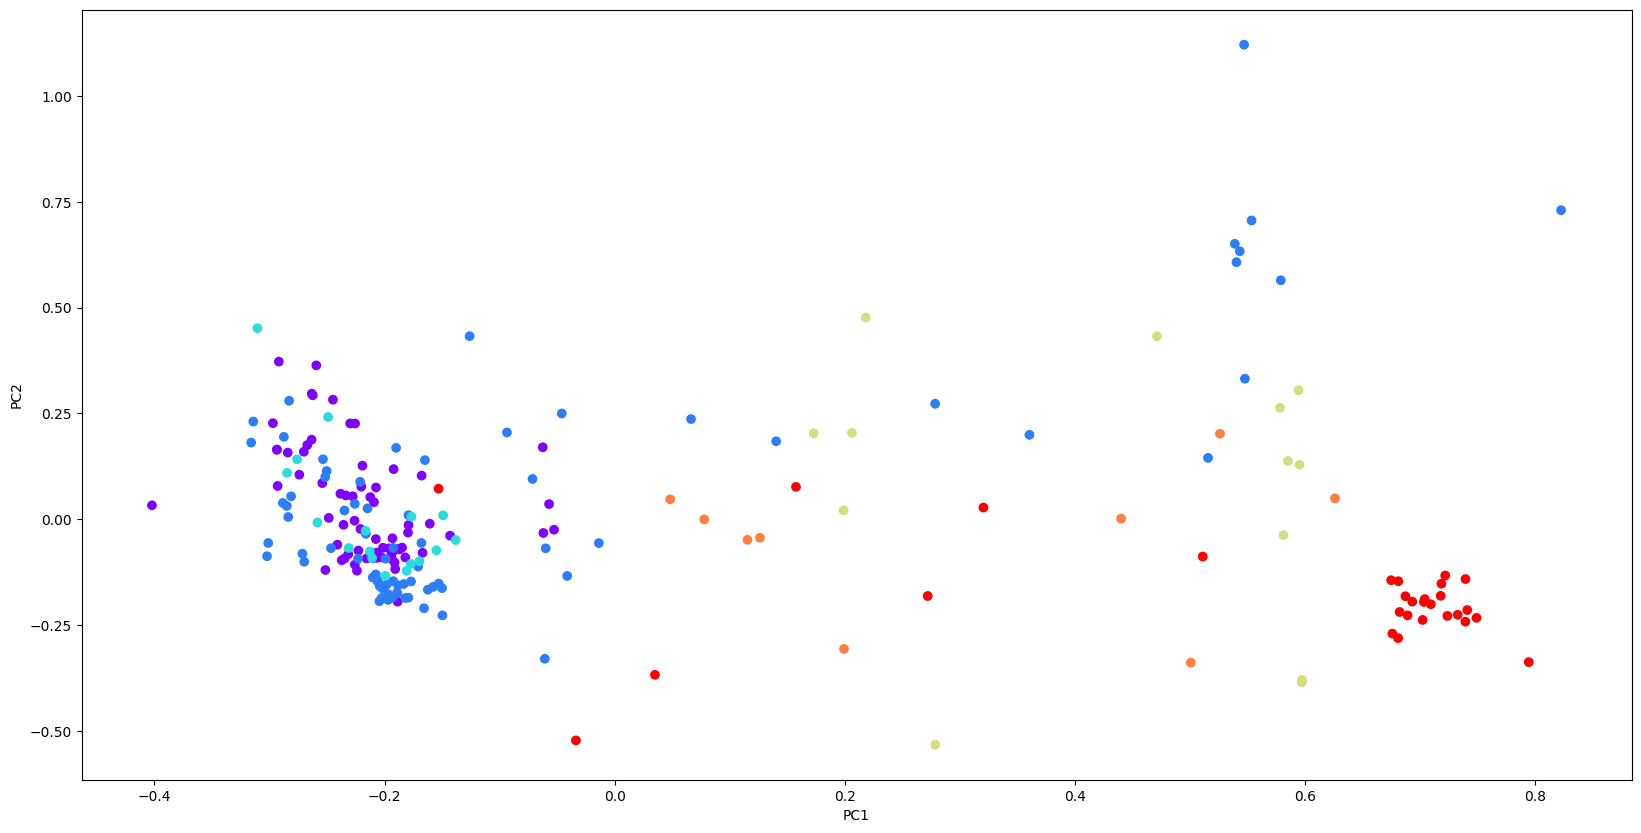

[0.45429569 0.17990097]
[5.1049308  3.21245688]


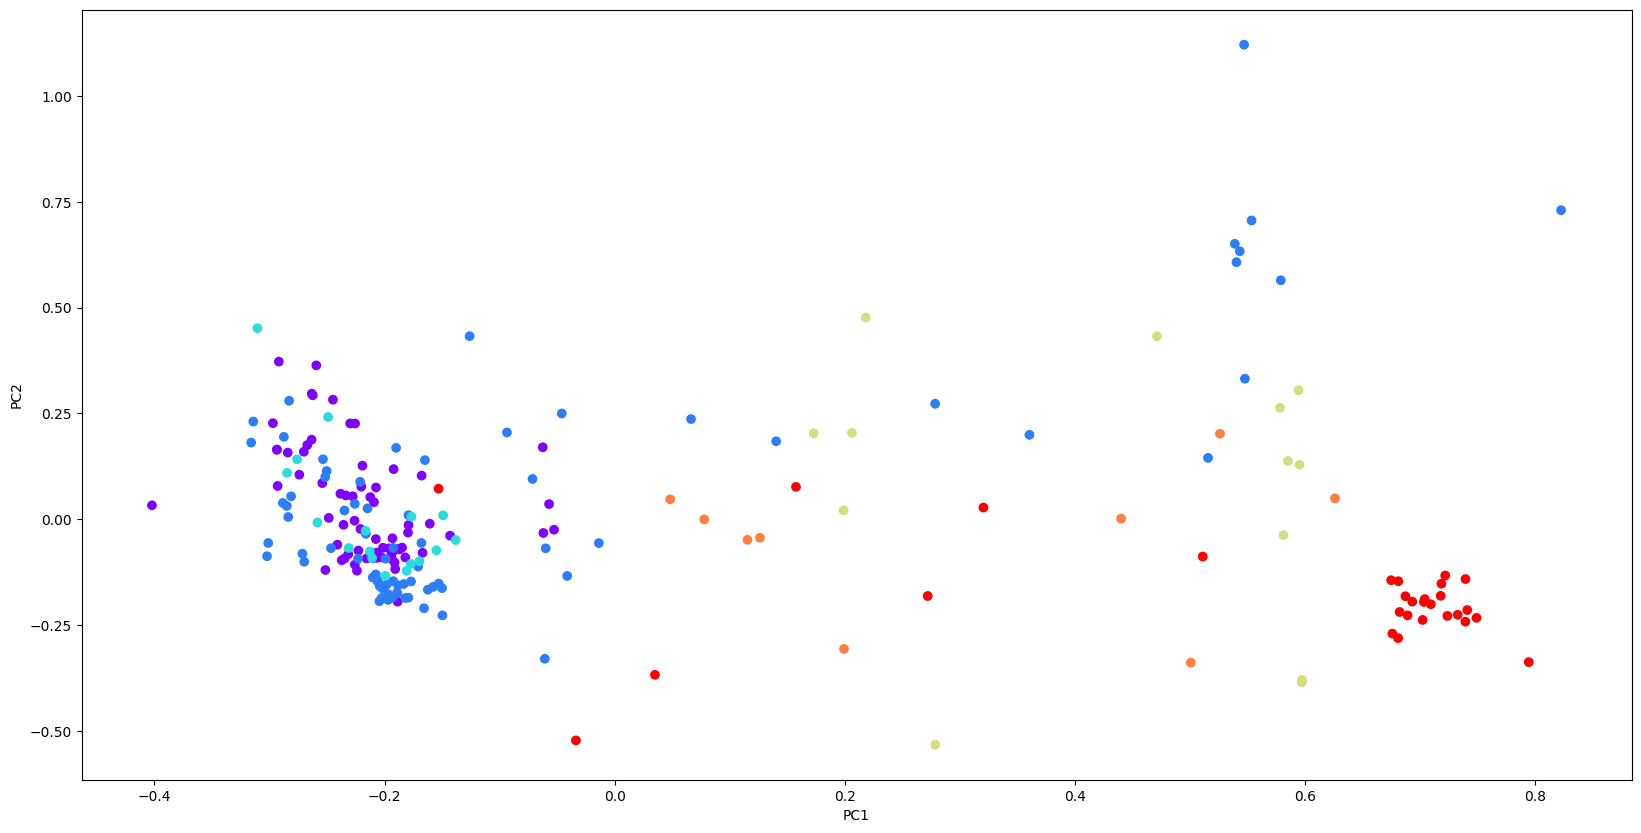

In [47]:
def run_pca(svd_solver='auto'):
    # Создаем объект PCA с заданным количеством компонент и методом SVD
    pca = PCA(n_components=2, svd_solver=svd_solver)

    # Применяем PCA к данным и преобразуем их
    pca_data = pca.fit(data).transform(data)

    # Выводим доли объясненной дисперсии и сингулярные значения
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)

    # Создаем фигуру и оси для визуализации
    fig, axs = plt.subplots(1, 1, figsize=(20, 10))  # Увеличиваем размер фигуры для лучшей видимости

    # Строим диаграмму рассеяния для первых двух главных компонент
    axs.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')

    plt.show()

# Запускаем PCA с различными методами SVD
run_pca('full')        # Полный метод SVD
run_pca('arpack')      # Метод ARPACK
run_pca('randomized')  # Случайный метод SVD


Разница не была найдена по полученным результатам. Скорее всего, разница заключается в скорости вычислений, так как параметр svd_solver отвечает за метод Single Value Decomposition

**Модификации метода главных компонент**

1. По аналогии с PCA исследуйте KernelPCA для различных параметров kernel и различных параметрах для ядра

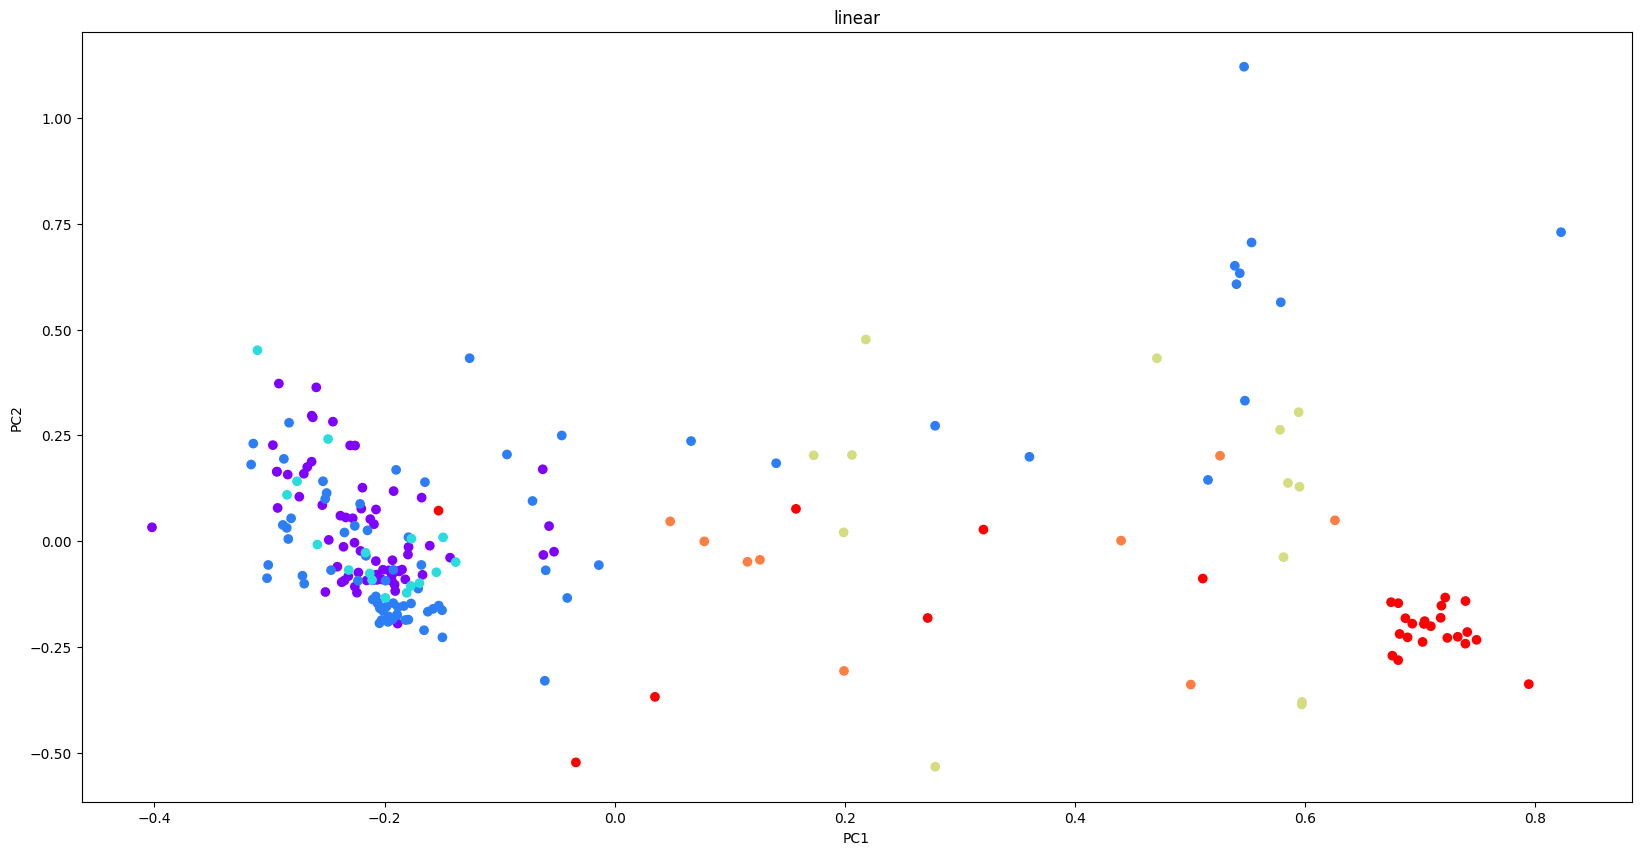

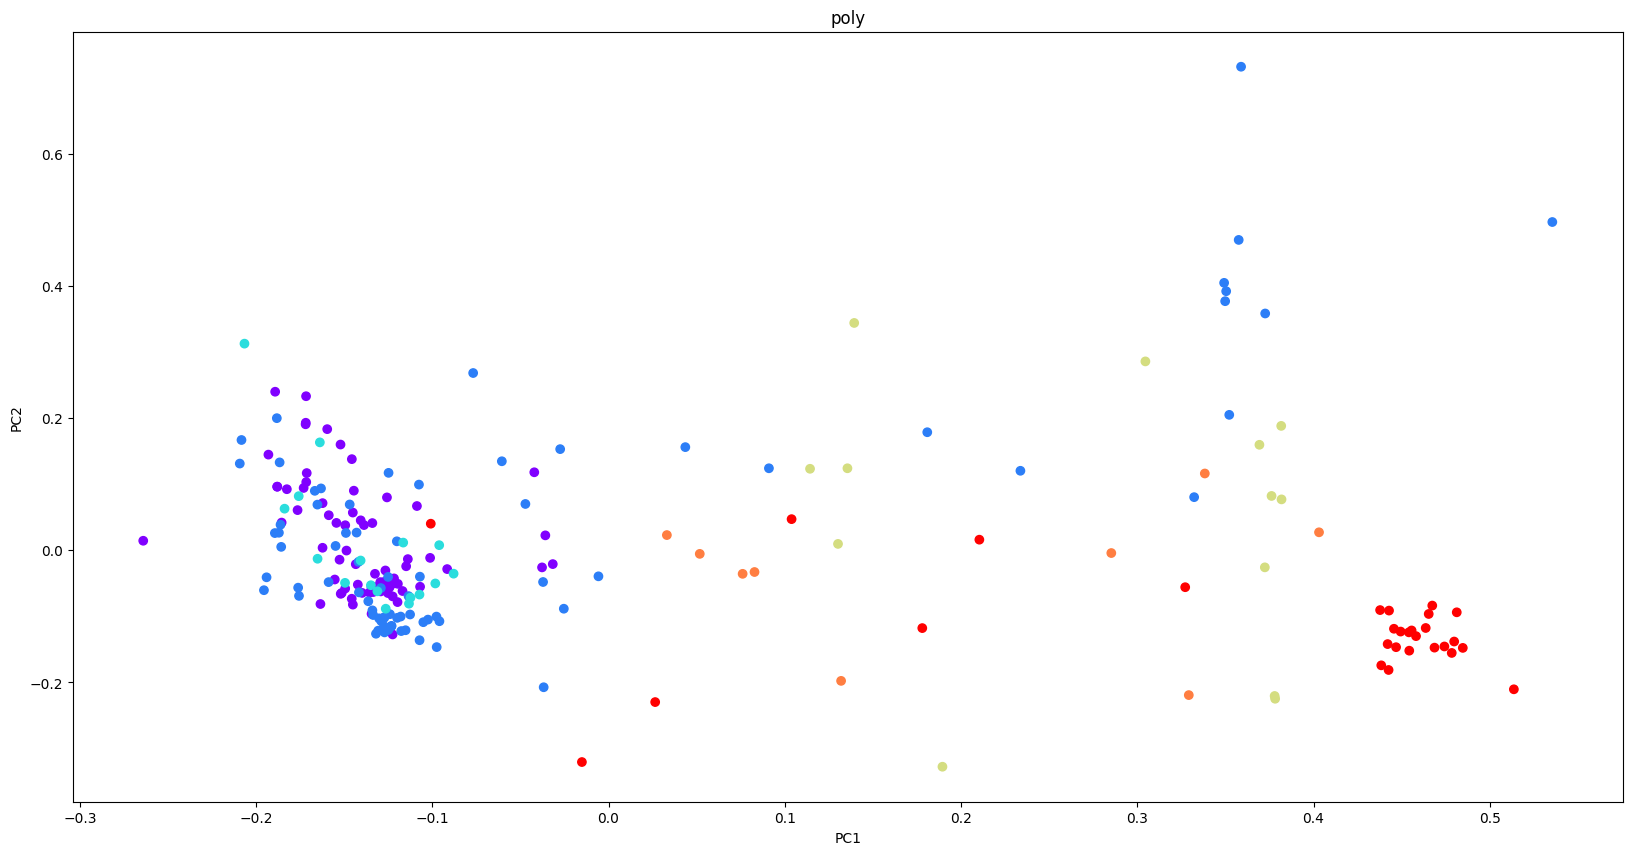

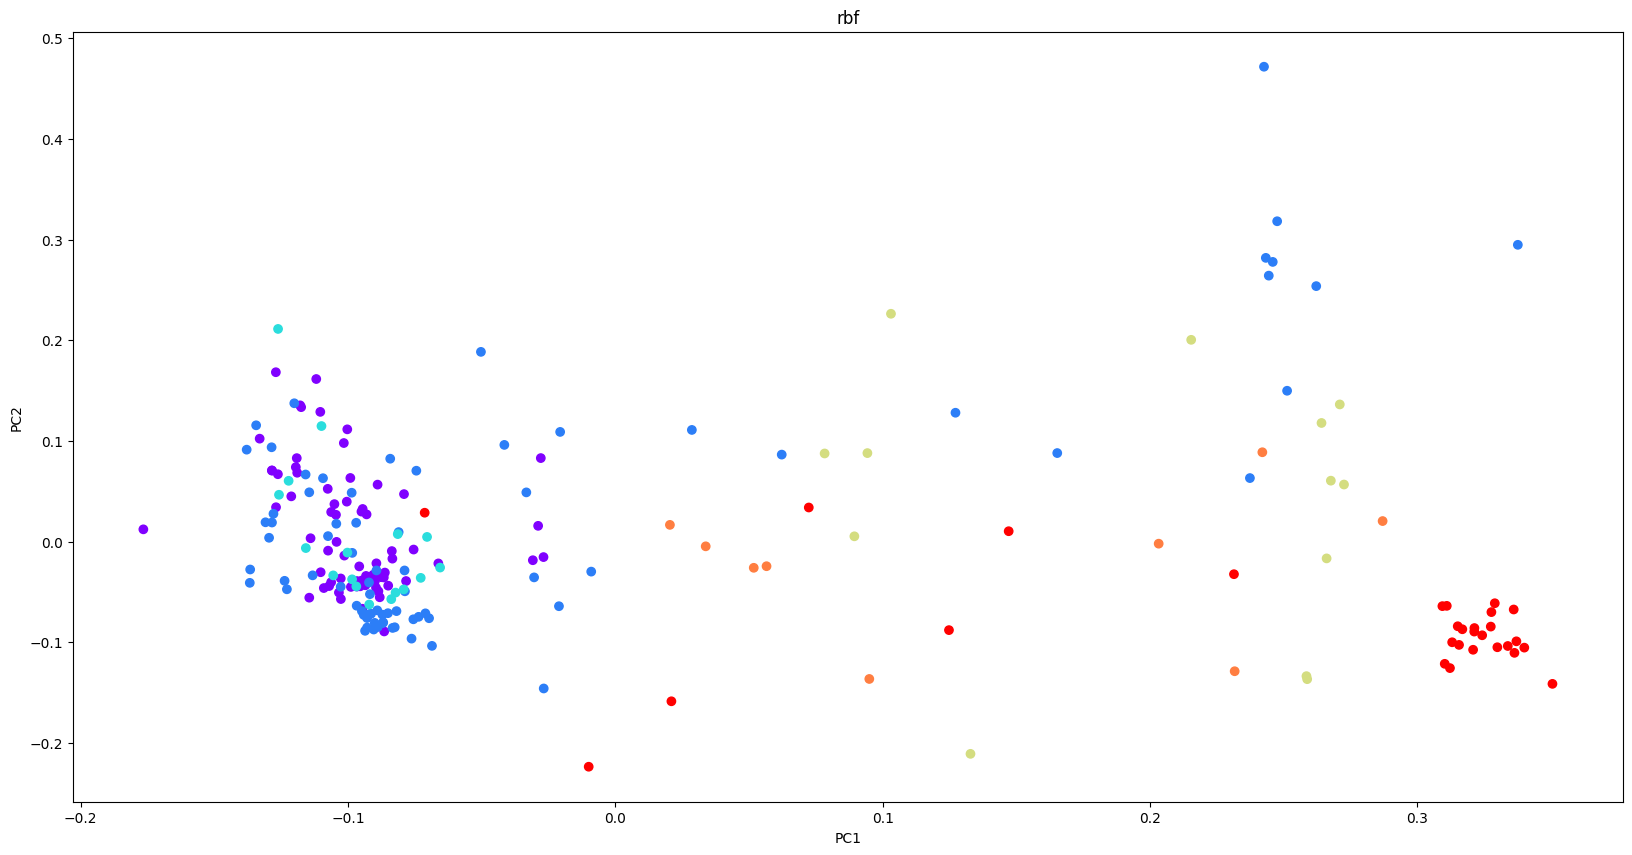

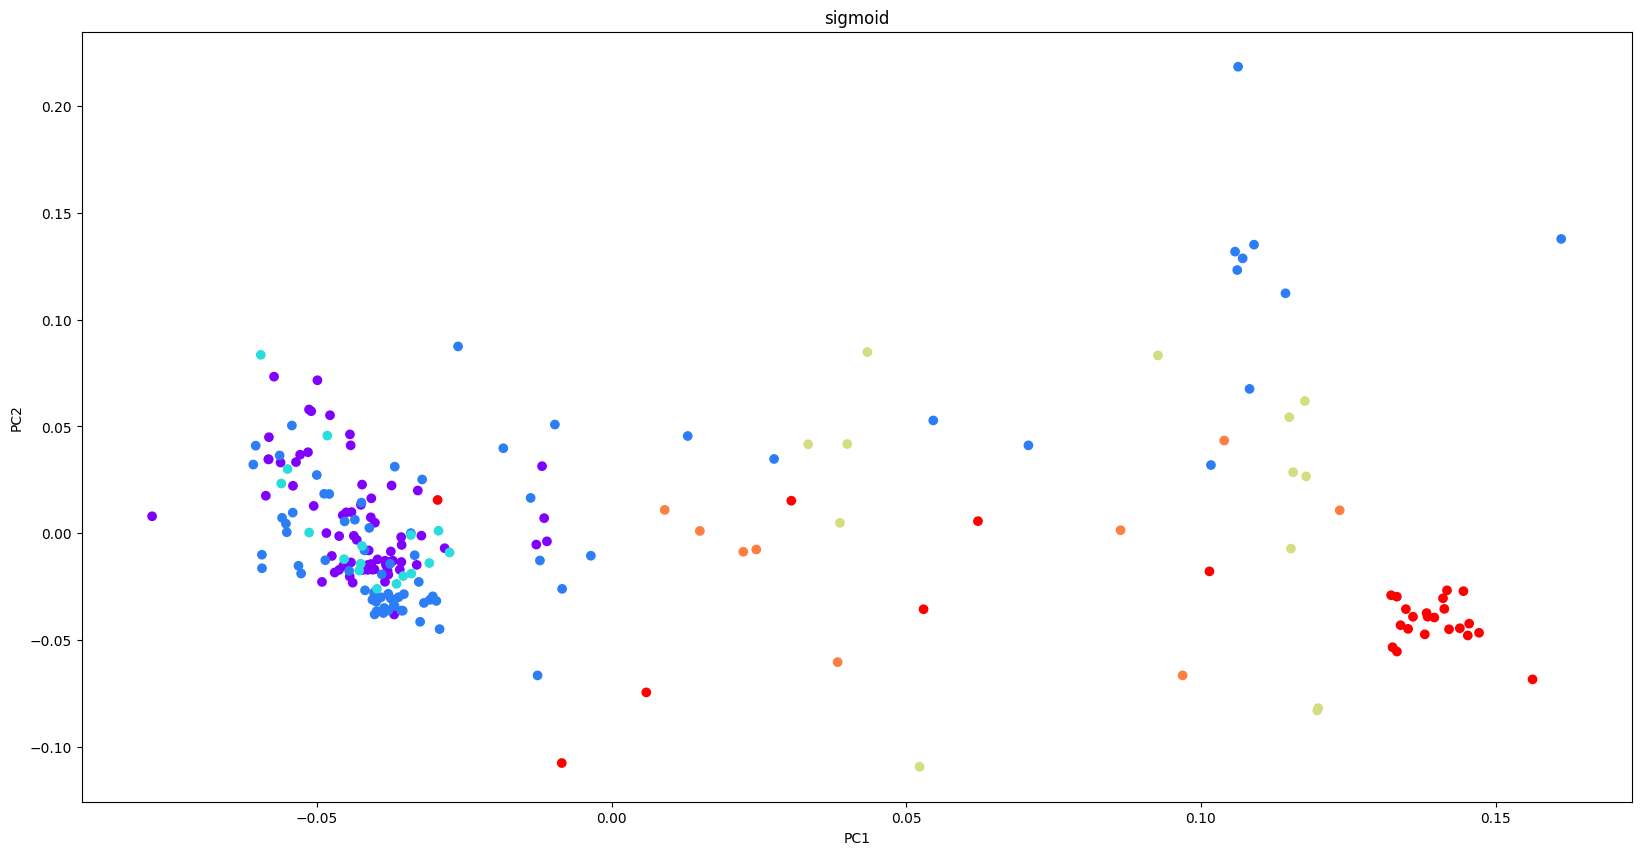

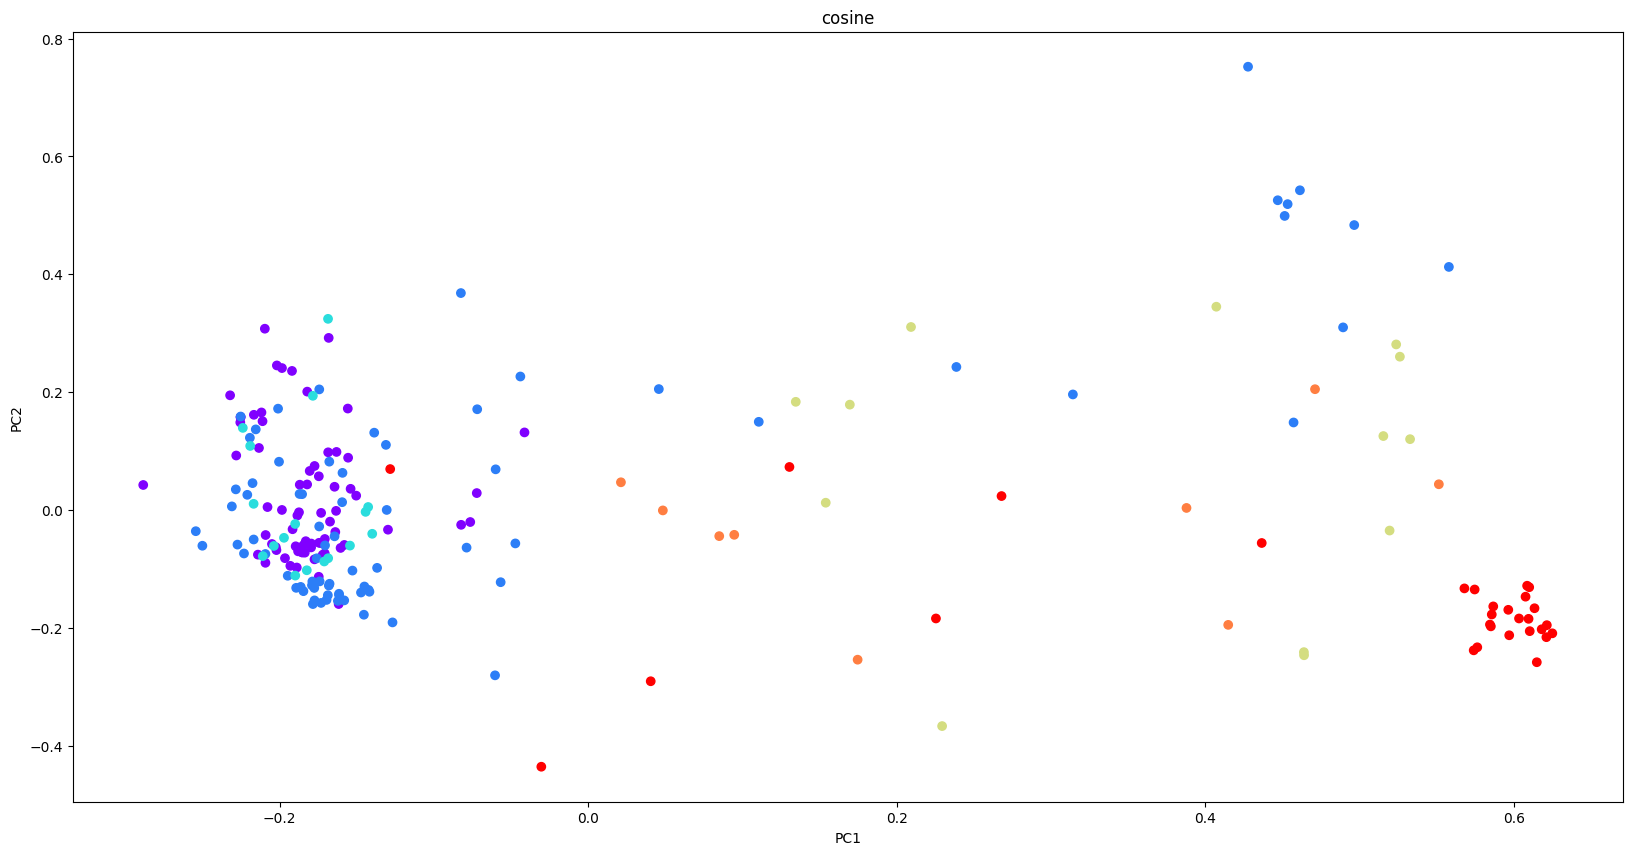

In [48]:
from sklearn.decomposition import KernelPCA  # Импортируем класс KernelPCA из библиотеки sklearn

# Определяем функцию для выполнения Kernel PCA с заданным ядром
def kpca_run(kernel='linear'):
    # Создаем объект KernelPCA с указанным количеством компонент и типом ядра
    pca = KernelPCA(n_components=2, kernel=kernel)

    # Применяем метод fit и transform к данным, чтобы получить преобразованные данные в пространстве главных компонент
    pca_data = pca.fit(data).transform(data)

    # Создаем фигуру и оси для визуализации (1 подграфик)
    fig, axs = plt.subplots(1, 1, figsize=(20, 10))

    # Строим диаграмму рассеяния для первых двух главных компонент
    axs.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')
    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')
    # Устанавливаем заголовок графика с указанием типа ядра
    axs.set_title(kernel)

    plt.show()

# Запускаем функцию kpca_run с различными типами ядер
kpca_run('linear')   # Запуск с линейным ядром
kpca_run('poly')     # Запуск с полиномиальным ядром
kpca_run('rbf')      # Запуск с радиально-базисным ядром
kpca_run('sigmoid')  # Запуск с сигмоидным ядром
kpca_run('cosine')   # Запуск с косинусным ядром



2. Определите, при каких параметрах KernelPCA работает также как PCA

KPCA и PCA работают по-разному, и их поведение зависит от типа ядра, используемого в KPCA. Основное различие между ними заключается в том, что PCA выполняет линейные преобразования, тогда как KPCA может обрабатывать нелинейные зависимости в данных

KPCA будет работать аналогично PCA, если используется линейное ядро. В этом случае KPCA будеи выполнять те же операции, что и стандартный PCA, поскольку линейное ядро не добавляет никакой дополнительной нелинейности в преобразование данных

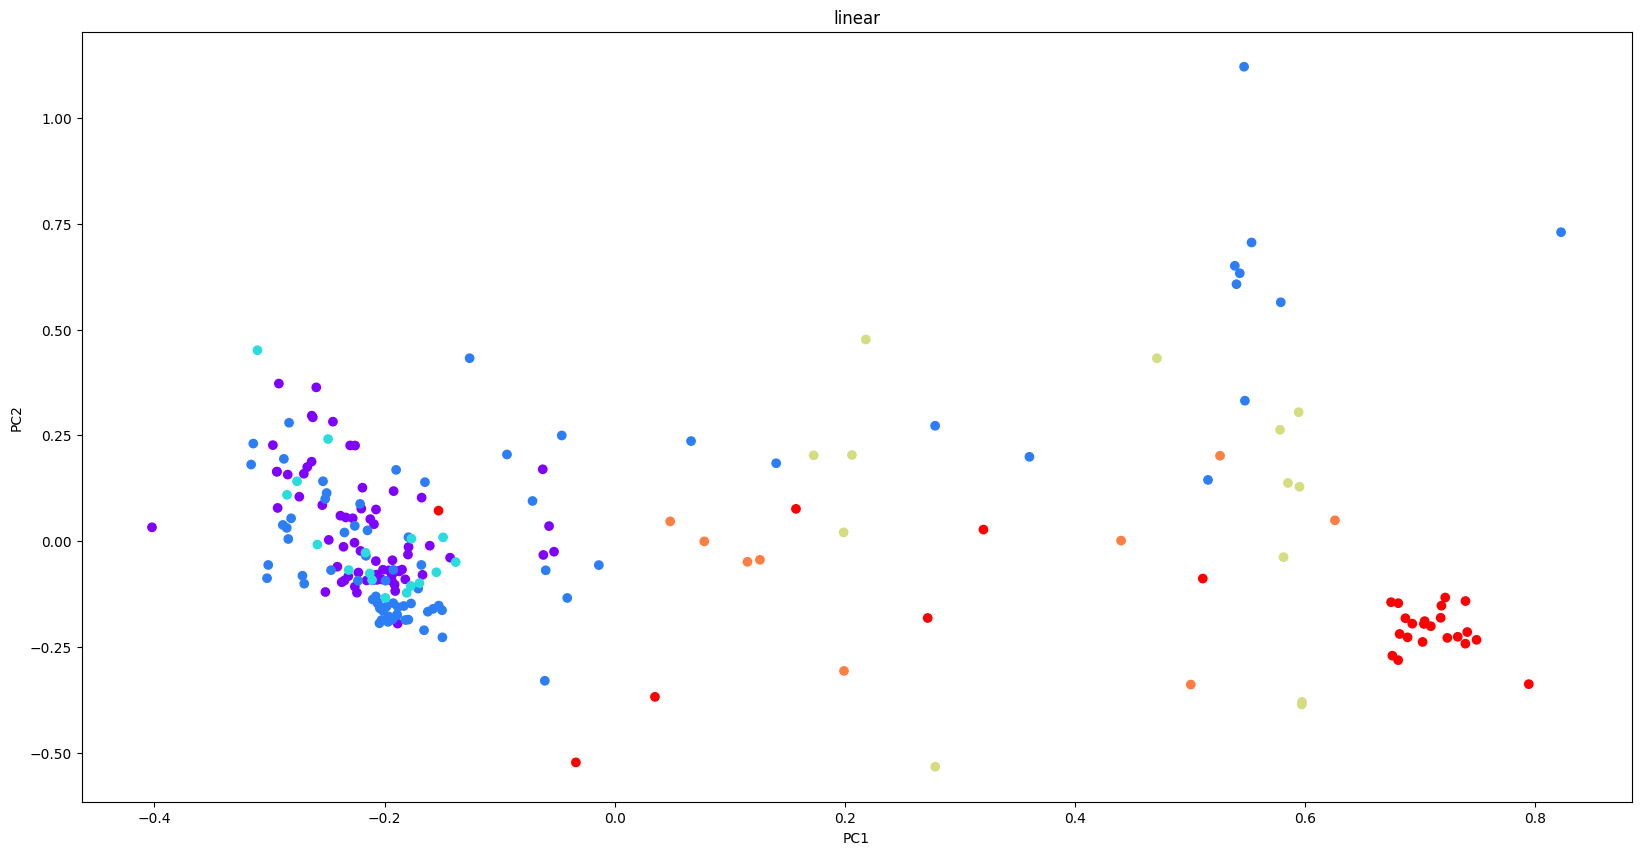

In [51]:
from sklearn.decomposition import KernelPCA  # Импортируем класс KernelPCA из библиотеки sklearn для выполнения Kernel PCA
import matplotlib.pyplot as plt  # Импортируем библиотеку для визуализации данных

# Определяем функцию для выполнения Kernel PCA с заданным ядром
def kpca_run(kernel='linear'):
    # Создаем объект KernelPCA с указанием количества компонент и типа ядра
    pca = KernelPCA(n_components=2, kernel=kernel)

    # Применяем метод fit и transform к данным, чтобы получить преобразованные данные в пространстве главных компонент
    pca_data = pca.fit(data).transform(data)

    # Создаем фигуру и оси для визуализации (1 подграфик) с заданным размером
    fig, axs = plt.subplots(1, 1, figsize=(20, 10))

    # Строим диаграмму рассеяния для первых двух главных компонент
    axs.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')

    axs.set_xlabel('PC1')
    axs.set_ylabel('PC2')
    # Устанавливаем заголовок графика с указанием типа ядра
    axs.set_title(kernel)

    plt.show()

# Запускаем функцию kpca_run с линейным ядром
kpca_run('linear')  # Это будет эквивалентно стандартному PCA


Пример для подтверждения


3. Аналогично исследуйте SparcePCA

KernelPCA может работать аналогично SparsePCA только в случае использования линейного ядра и применения методов для достижения разреженности в результатах. Это происходит из-за различных целей применения: KernelPCA предназначен для выявления нелинейных структур в данных, тогда как SparsePCA ориентирован на создание разреженных представлений. В принципе, можно получить эквивалентные результаты, но дляя этого необходимо тщательно подбирать параметры и методы регуляризации

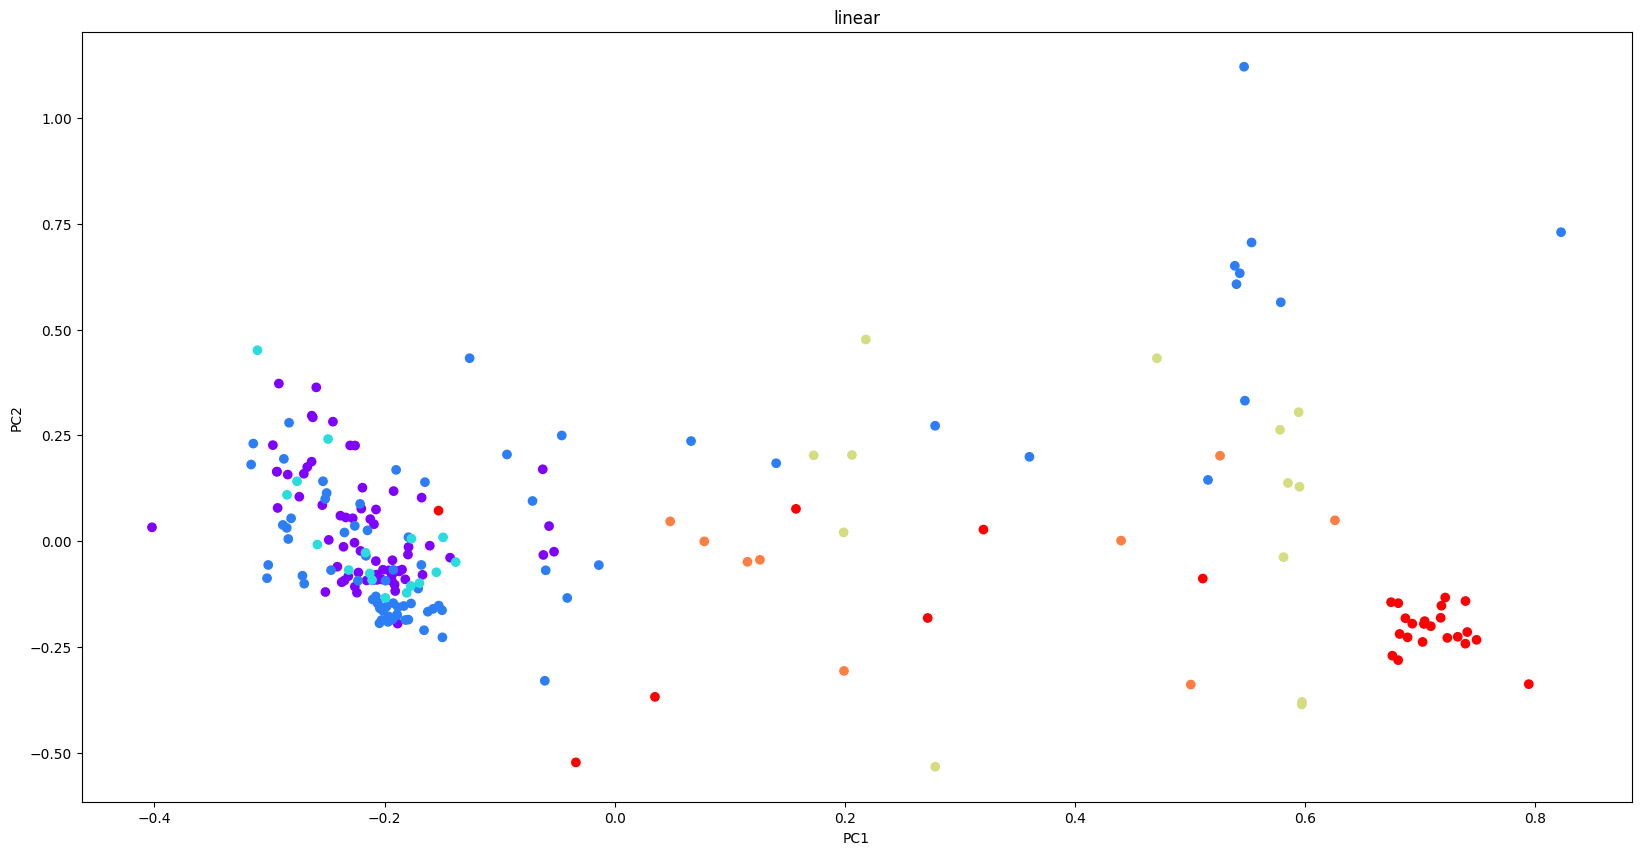

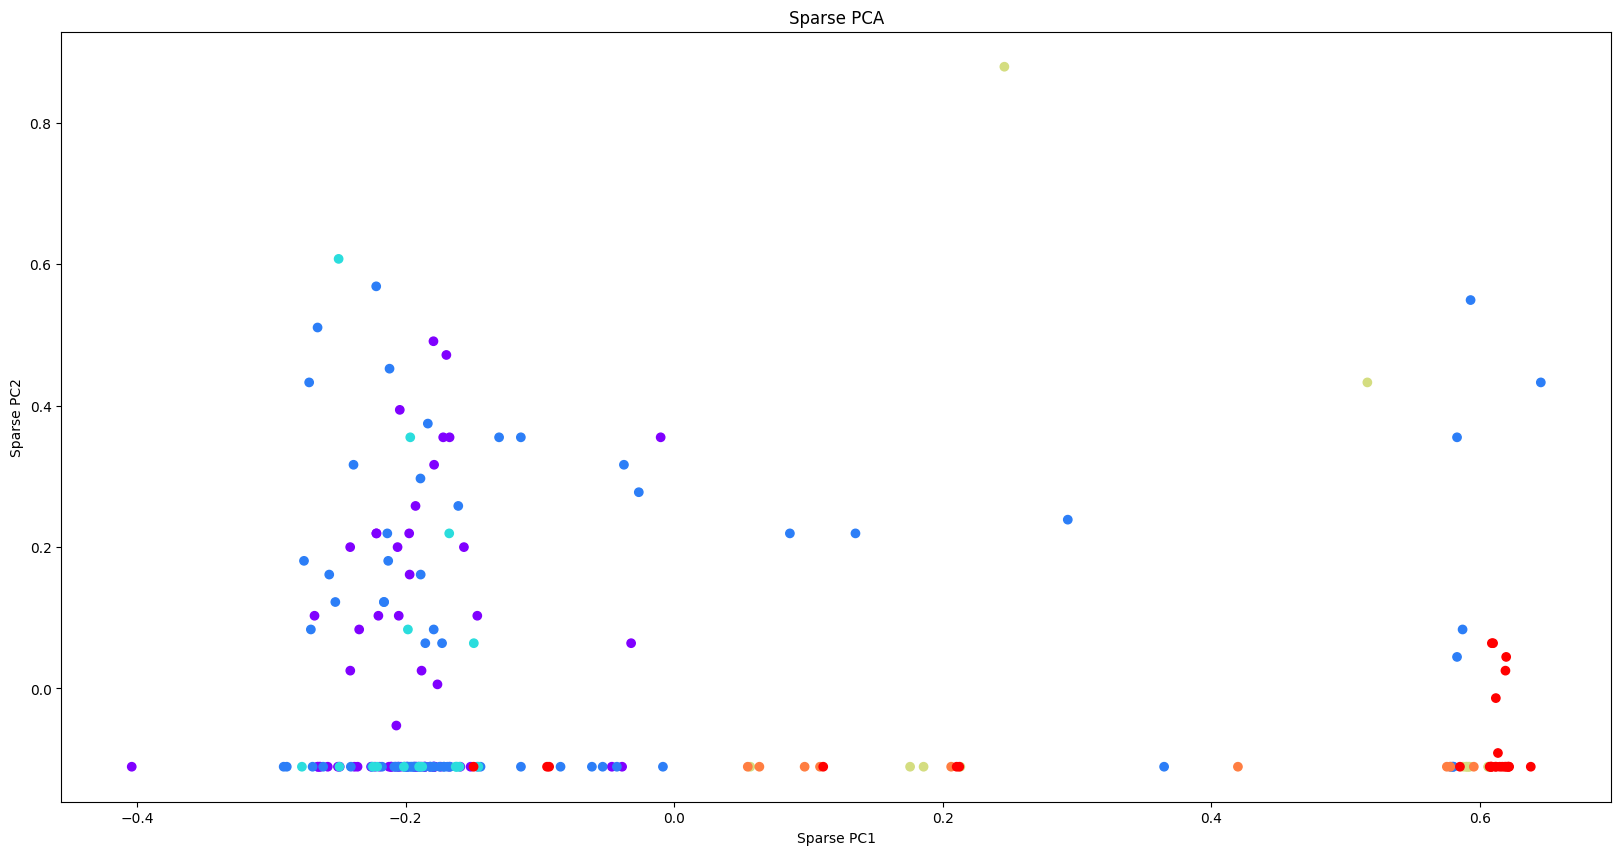

In [55]:
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Функция для выполнения Sparse PCA
def sparse_pca_run():
    spca = SparsePCA(n_components=2)  # Создаем объект Sparse PCA с 2 компонентами
    spca_data = spca.fit_transform(data)  # Применяем Sparse PCA к данным

    # Визуализируем результаты
    fig, axs = plt.subplots(1, 1, figsize=(20, 10))
    axs.scatter(spca_data[:, 0], spca_data[:, 1], c=labels, cmap='rainbow')
    axs.set_xlabel('Sparse PC1')
    axs.set_ylabel('Sparse PC2')
    axs.set_title('Sparse PCA')
    plt.show()

# Запускаем функции для сравнения
kpca_run('linear')  # Запуск Kernel PCA с линейным ядром
sparse_pca_run()    # Запуск Sparse PCA

Пример для подтверждения


**Факторный анализ**

1. Проведите понижении размерности используя факторный анализ FactorAnalysis

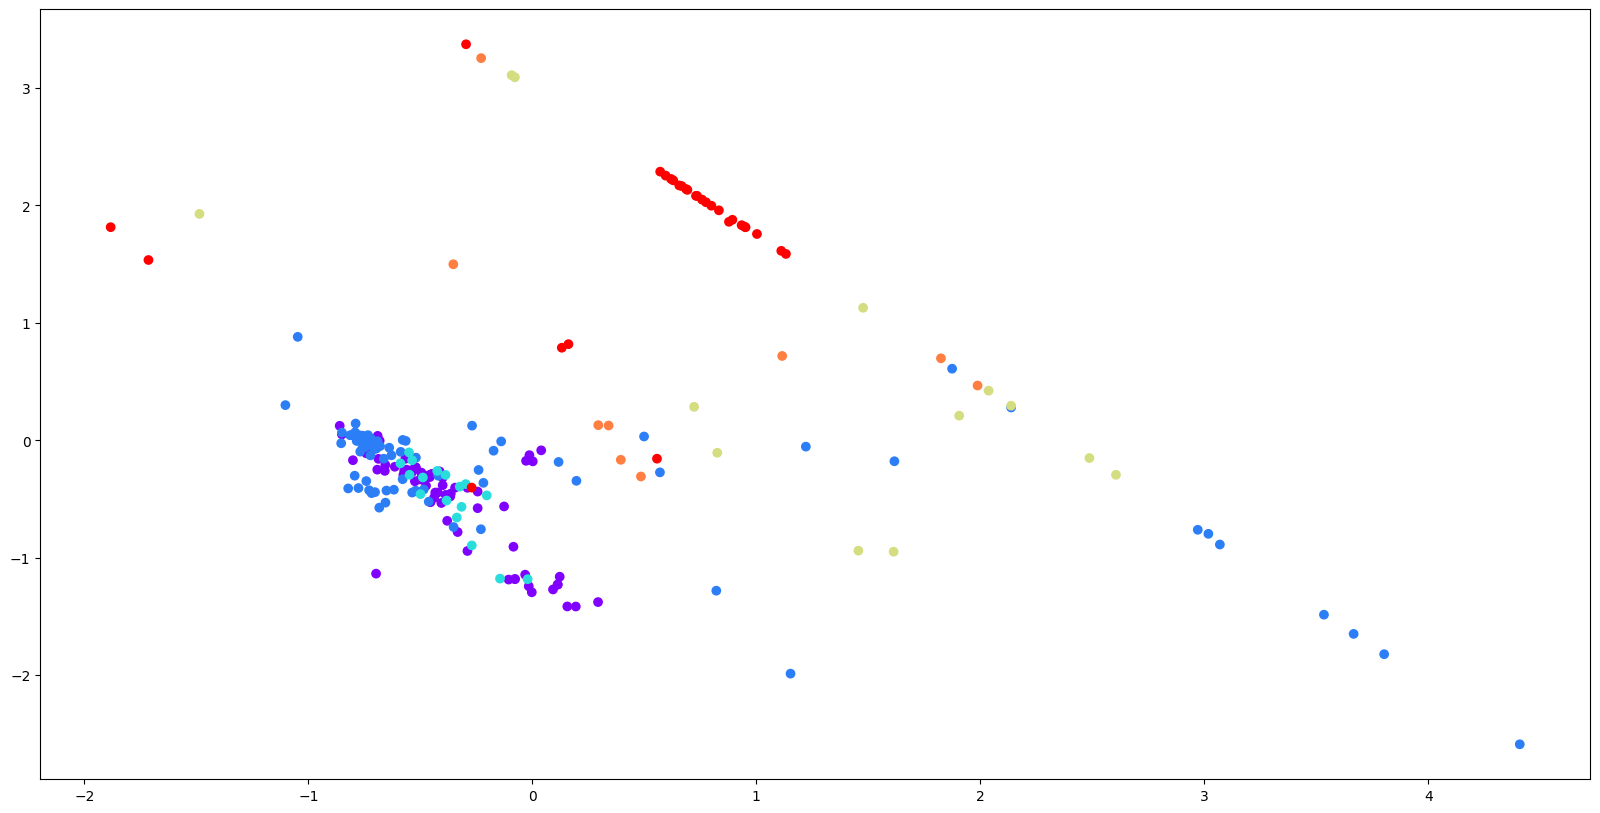

In [58]:
from sklearn.decomposition import FactorAnalysis  # Импортируем класс FactorAnalysis из библиотеки sklearn

def fcan_run(tol=0.01):
    # Создаем объект FactorAnalysis с указанием количества компонент  и порога сходимости (tol)
    pca = FactorAnalysis(n_components=2, tol=tol)

    # Применяем метод fit и transform к данным, чтобы получить преобразованные данные в пространстве факторов
    pca_data = pca.fit(data).transform(data)

    # Создаем фигуру и оси для визуализации (1 подграфик) с заданным размером
    fig, axs = plt.subplots(1, 1, figsize=(20, 10))

    # Строим диаграмму рассеяния для первых двух факторо
    axs.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow')

    plt.show()

# Запускаем функцию fcan_run с заданным значением tol
fcan_run(0.01)


2. Сравните полученные результаты с PCA

1. Диаграмма FA (Factor Analysis):

*   На диаграмме FA видно, что точки сгруппированы в несколько кластеров, но факторы, найденные методом FA, не обязательно хорошо разделяют классы. Основная цель FA — найти скрытые латентные факторы, объясняющие зависимость между переменными, а не максимизировать дисперсию, как в PCA
*   Некоторые классы, такие как красный и голубой, более явно отделяются, но другие (например, синие и фиолетовые) перекрываются, что указывает на меньшую дифференциацию между группами

2. Диаграмма PCA (Principal Component Analysis):

*   На диаграмме PCA, которая была построена ранее, наблюдается лучшее разделение данных по первым двум главным компонентам. Это связано с тем, что PCA специально фокусируется на выборе таких осей, вдоль которых дисперсия максимальна
*   На PCA диаграмме классы более чётко разделяются, особенно те, у которых высокая внутриклассовая дисперсия, такие как классы 1, 2, и 3




3. Объясните в чем разница между методом главных компонент и факторным анализом

Основные различия:

*   PCA: Основное внимание уделяется максимальной дисперсии данных, что позволяет лучше различать классы, если они имеют различную структуру или характер распределения. Это приводит к более четкому разделению групп
*   FA: Сосредоточен на объяснении корреляций и ковариации между переменными. В результате найденные факторы могут не так чётко разделять классы, как главные компоненты в PCA






